In [39]:
import random
from matplotlib import pyplot as plt

class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        # len(self.grid) = cols
        # len(self.grid[0]) = rows
        self.cols, self.rows = (x_dim, y_dim)
        self.grid = [[0 for _ in range(self.cols)] for _ in range(self.rows)]
    
    # def get_grid(self):
    #     return self.grid

    # def print_grid(self):
    #     for i in range(self.rows):
    #         for j in range(self.cols):
    #             print(f'{self.grid[i][j]} ', end=' ')
    #         print()
    #     print()

    def count_grid(self):
        '''
        Counts the total number of living cells
        '''
        count = sum(sum(dim) for dim in self.grid)
        return count

    def populate_grid(self, coord):
        '''
        Popuates the grid with living cells based on coordinates provided
        
        Parameters:
        coord: A list of tuples; each tuple represents the (x, y) coordinates of a live cell
        '''
        self.coords = coord
        for i,j in self.coords:
            self.grid[j-1][i-1] = 1
        self.draw_grid()
        
    def random_grid(self):
        '''
        Popuates the grid with living cells at random
        '''
        for i in range(self.rows):
            for j in range(self.cols):
                self.grid[j][i] = random.choice([0, 1])
        self.draw_grid()

    def make_step(self):
        '''
        Advances one generation
        '''
        sum_grid = [[0 for _ in range(self.cols)] for _ in range(self.rows)]
        # print(self.rows)
        # print(self.cols)
        # c_corners = 0
        # c_edges = 0
        # c_middle = 0
        for i in range(self.rows):
            for j in range(self.cols):
                # print(f'{i} x {j}')
                n_neighbours = 0
                # corners
                if i == 0 and j == 0:
                    # print(f'Corner: {i} x {j}')
                    # c_corners += 1
                    if self.grid[i+1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j+1] == 1:
                        n_neighbours += 1
                elif i == self.rows-1 and j == self.cols-1:
                    # print(f'Corner: {i} x {j}')
                    # c_corners += 1
                    if self.grid[i-1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j-1] == 1:
                        n_neighbours += 1
                elif i == 0 and j == self.cols-1:
                    # print(f'Corner: {i} x {j}')
                    # c_corners += 1
                    if self.grid[i+1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j-1] == 1:
                        n_neighbours += 1
                elif j == 0 and i == self.rows-1:
                    # print(f'Corner: {i} x {j}')
                    # c_corners += 1
                    if self.grid[i][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j+1] == 1:
                        n_neighbours += 1
                # edge
                elif i == 0:
                    # print(f'Edge: {i} x {j}')
                    # c_edges += 1
                    if self.grid[i+1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j-1] == 1:
                        n_neighbours += 1
                elif i == self.rows-1:
                    # print(f'Edge: {i} x {j}')
                    # c_edges += 1
                    if self.grid[i][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j-1] == 1:
                        n_neighbours += 1
                elif j == 0:
                    # print(f'Edge: {i} x {j}')
                    # c_edges += 1
                    if self.grid[i+1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j+1] == 1:
                        n_neighbours += 1
                elif j == self.cols-1:
                    # print(f'Edge: {i} x {j}')
                    # c_edges += 1
                    if self.grid[i+1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j-1] == 1:
                        n_neighbours += 1
                # middle
                else:
                    # print(f'Middle: {i} x {j}')
                    # c_middle += 1
                    if self.grid[i+1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j] == 1:
                        n_neighbours += 1
                    if self.grid[i][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j+1] == 1:
                        n_neighbours += 1
                    if self.grid[i-1][j-1] == 1:
                        n_neighbours += 1
                    if self.grid[i+1][j-1] == 1:
                        n_neighbours += 1
                
                # print(f'{i}x{j}: {n_neighbours}')
                sum_grid[i][j] = n_neighbours
        # print(f'Expected:\tCorners: 4 + Edges: {2*self.rows + 2*(self.cols-2) - 4} + Middle: {self.rows * self.cols - (2*self.rows + 2*(self.cols-2) - 4) -4}')
        # print(f'Actual:\t\tCorners: {c_corners} + Edges: {c_edges} + Middle: {c_middle}')
        # for i in range(self.rows):
        #     for j in range(self.cols):
        #         print(f'{sum_grid[i][j]} ', end=' ')
        #     print()
        for i in range(self.rows):
            for j in range(self.cols):
                if sum_grid[i][j] < 2:
                    # print('dead')
                    self.grid[i][j] = 0
                if sum_grid[i][j] > 2:
                    # print('dead')
                    self.grid[i][j] = 0
                if sum_grid[i][j] == 3:
                    # print('alive')
                    self.grid[i][j] = 1
        self.draw_grid()

    def make_n_steps(self, n):
        '''
        Advances n generations

        Parameters:
        n steps
        '''
        for i in range(n):
            self.make_step()
        # self.draw_grid()

    def draw_grid(self):
        '''
        Draws the grid
        '''
        x=[]
        y=[]
        for i in range(self.cols):
            for j in range(self.rows):
                x.append(j)
                y.append(i)
        plt.figure(figsize=(3, 3))
        plt.scatter(x, y, c=self.grid, s=500, marker='s')
        plt.xlim(-0.5, self.rows-0.5)
        plt.ylim(-0.5, self.cols-0.5)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
        plt.gca().invert_yaxis()
        plt.plot()

In [46]:
game = GameOfLife(30, 30)
# help(game.draw_grid)

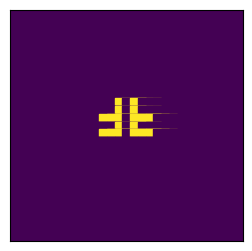

In [47]:
# game.random_grid()
# game.populate_grid([(2,1),(3,2),(3,3),(2,3),(1,3)])
# game.populate_grid([(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)])
# game.populate_grid([(10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14)])
game.populate_grid([(14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16), (16, 14), (16, 15), (16, 17), (16, 18), (18, 14), (18, 15), (18, 17), (18, 18), (14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)])

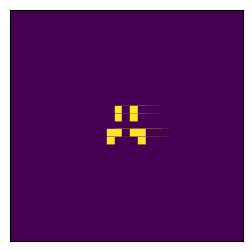

In [48]:
game.make_step()

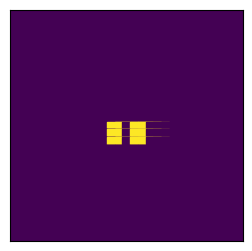

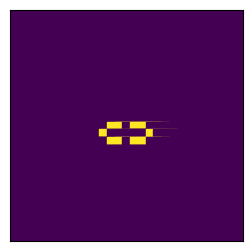

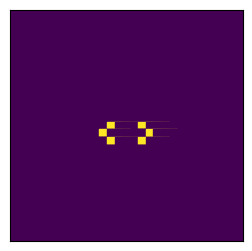

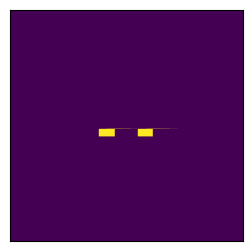

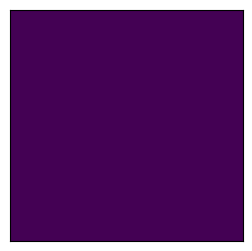

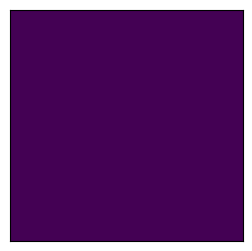

In [49]:
game.make_n_steps(6)

In [48]:
# comment draw_grids

def analyse(g, s, n):
    for i in range(n):
        game = g
        game.random_grid()
        s = game.count_grid()
        starts.append(s)
        game.make_n_steps(s)
        e = game.count_grid()
        ends.append(e)
        d = s-e
        diffs.append(d)
        if s != 0 and e != 0:
            r = round(s / e, 2)
            ratios.append(r)
        else:
            ratios.append('')
        # print(f'{i}: {s} {e} {d}')

starts=[]
ends=[]
diffs=[]
ratios=[]

x=10
y=10
s=10
n=10
g = GameOfLife(x, y)
analyse(game, s, n)
list(zip(start,end,diff,ratio))

ratios_cleaned = [_ for _ in ratios if _ != '']

xy=x*y
starts_mean = sum(starts)/len(starts)
ends_mean = sum(ends)/len(ends)
diffs_mean = sum(diffs)/len(diffs)
ratios_mean = sum(ratios_cleaned)/len(ratios_cleaned)

print(f'Means for {n} rounds of {s} steps for a {x}x{y} grid with random starts')
print(f'Start:\t {starts_mean}\t{starts_mean/xy*100:.2f}%')
print(f'Change:\t{-diffs_mean}')
print(f'End:\t {ends_mean}\t{ends_mean/xy*100:.2f}%')
print(f'Loss:\t {(starts_mean-ends_mean)/starts_mean*100:.0f}%')
print(f'Ratios:\t {ratios_mean:.2f}\t{ratios_mean/xy*100:.2f}%')

Means for 10 rounds of 10 steps for a 10x10 grid with random starts
Start:	 17.9	17.90%
Change:	-16.0
End:	 1.9	1.90%
Loss:	 89%
Ratios:	 4.88	4.88%
